## 2. Regresja liniowa

In [16]:
library(yaml)

### 2.1 Wczytywanie konfiguracji (*config.yaml*):

In [10]:
config <- yaml.load_file("../config.yaml")

train_filepath <- file.path("..", config$paths$data_train)
test_filepath <- file.path("..", config$paths$data_test)

### 2.2 Wczytywanie danych treningowych (*train.csv*)

In [15]:
data_train <- read.csv(train_filepath)

cat("Wymiarowość zbioru:", dim(data_train))

cat("\nPrzykładowe elementy zbioru:")
head(data_train, 5)

Wymiarowość zbioru: 10001 16
Przykładowe elementy zbioru:

,name,elo,games,avg_moves,frac_nonterm,avg_cp_loss,avg_inacc,avg_mist,avg_blund,frac_time_win,frac_time_loss,avg_time_good,avg_time_inaccm,avg_time_blund,avg_mat_imb_per_mv,avg_book_moves
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,astrolfos,1637,11,31.54545,0.5454545,64.03458,1.636364,1.363636,1.545455,0.6301667,0.9950000,11.797980,16.878788,18.647059,4.201729,1.818182
2,barbarik77,1489,10,35.00000,1.0000000,81.44857,1.800000,2.600000,1.800000,0.4783333,0.3511111,5.878472,7.522727,8.833333,3.862857,2.100000
3,FawkingAwesome,1370,10,29.10000,0.7000000,110.08935,2.500000,2.400000,1.900000,0.4477778,0.6200000,10.251121,15.571429,19.000000,2.127148,2.300000
4,ZeNNgiLy,1431,10,28.40000,0.5000000,102.34859,2.100000,1.700000,1.800000,0.4490476,0.7088889,9.872807,16.368421,16.055556,3.566901,2.500000
5,lelouch_VV,1473,10,44.50000,0.5000000,68.60674,2.600000,2.900000,2.200000,0.5946667,0.5845833,7.687500,9.945455,15.136364,5.368539,0.300000


### 2.3 Prosta regresja liniowa

W wariancie prostej regresji liniowej wykorzystujemy tylko jedną zmienną niezależną. W przypadku omawianego zbioru wykorzystana zostanie zmienna **avg_cp_loss** - średnie odchylenie jakości gry względem ruchów silnika.

In [22]:
fit_simple <- lm(elo ~ avg_cp_loss, data = data_train)

cat("Składowe obiektu fit_simple:\n")
cat(names(fit_simple))

Składowe obiektu fit_simple:
coefficients residuals effects rank fitted.values assign qr df.residual xlevels call terms model

Poniżej znajdują się najważniejsze informacje o wykorzystanym modelu regresji liniowej:

In [58]:
cat("Współczynniki:\n--------------------\n")
cat("Przecięcie (intercept):", coef(fit_simple)[1], "\n")
cat("Nachylenie (slope):", coef(fit_simple)[2], "\n")
cat("Przedziały ufności:", confint(fit_simple), "\n\n")

cat("Inne:\n--------------------\n")
summary_list <- summary(fit_simple)
cat("Sigma:", summary_list$sigma, "\n")
cat("R-kwadrat:", summary_list$r.squared, "\n")
cat("F-stat:", summary_list$fstatistic, "\n")


Współczynniki:
--------------------
Przecięcie (intercept): 2493.997 
Nachylenie (slope): -11.74407 


Przedziały ufności: 2478.408 -11.93686 2509.587 -11.55128 

Inne:
--------------------
Sigma: 250.6759 
R-kwadrat: 0.5877949 
F-stat: 14258.34 1 9999 


Na podstawie powyższych wyników możemy wysunąć następujące wnioski:
- Ujemny współczynnik nachylenia prostej świadczy o tym, że ranking gracza (**elo**) jest odwrotnie proporcjonalny do średniej straty w centypionach (**avg_cp_loss**), co potwierdza intuicyjne przypuszczenia
- Wartość $\sigma = 250.6759$ świadczy o tym, że błąd prognozy przy użyciu powyższego modelu regresji wynosi około 250 punktów rankingowych
- $R^2$ mierzy, jak dobrze model dopasowuje dane. Wynosi on $R^2=0.5878$, co oznacza, że model wyjaśnia około 58.78% zmienności w danych. Wartości powyżej 0.5 wskazują na przyzwoite, choć nieidealne dopasowanie modelu.
- $F-statystyka$ to test istotności modelu. Im wyższa wartość, tym bardziej model jest statystycznie istotny. Wartość 14258.34 sugeruje, że model jest bardzo istotny statystycznie — prawdopodobnie różnica między modelami z i bez zmiennych predyktorów jest bardzo znacząca.

Poniżej znajdują się wizualizacje dla omawianego wyżej wariantu regresji liniowej:

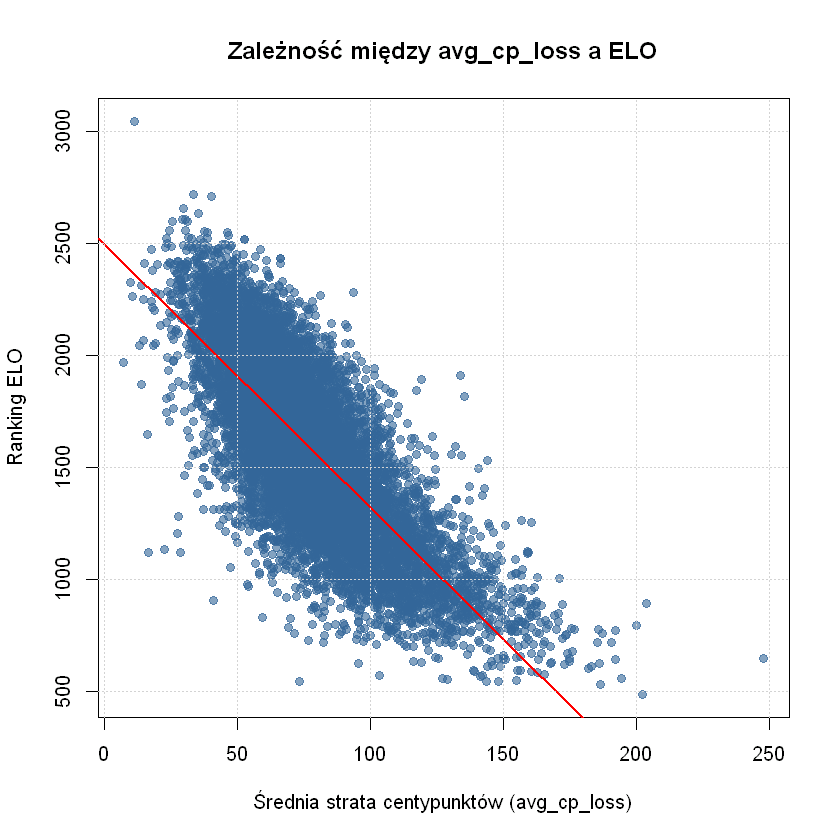

In [60]:
plot(data_train$avg_cp_loss, data_train$elo,
     main = "Zależność między avg_cp_loss a ELO",
     xlab = "Średnia strata centypunktów (avg_cp_loss)",
     ylab = "Ranking ELO",
     pch = 19,                    # pełne kółka
     col = rgb(0.2, 0.4, 0.6, 0.6))  # półprzezroczysty niebieski

abline(fit_simple, col = "red", lwd = 2)  # linia regresji na czerwono i grubsza

grid()  # siatka pomocnicza

Jak można zauważyć na wykresie, wyznaczona prosta dosyć dobrze radzi sobie z przybliżaniem rozkładu rankingu względem jakości gry, choć sam rozkład jest wyraźnie nieliniowy.

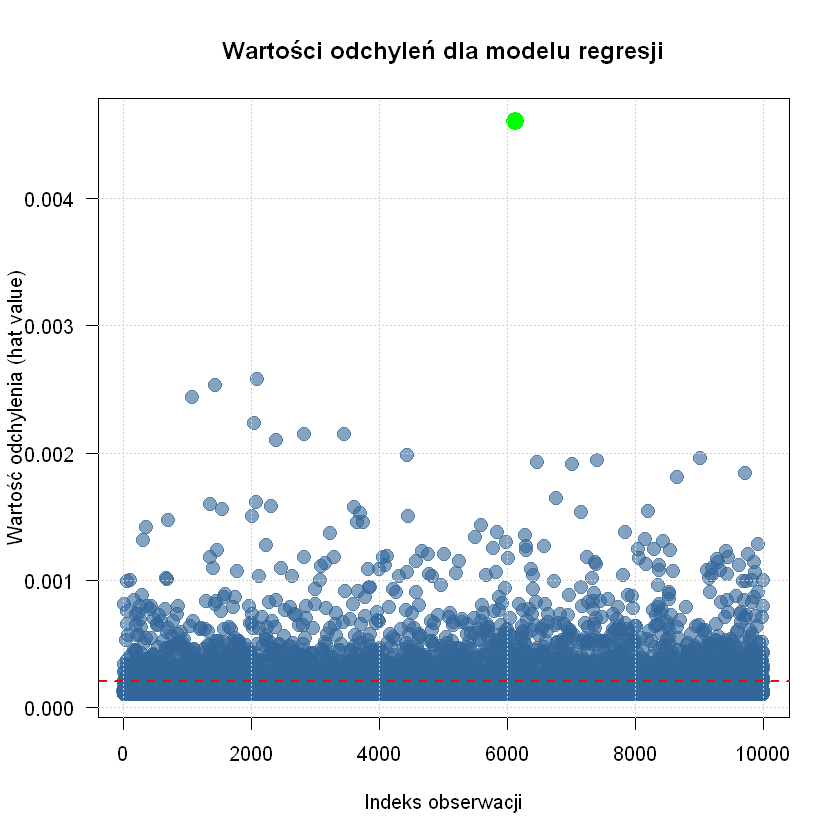

In [63]:
plot(hatvalues(fit_simple),
     main = "Wartości odchyleń dla modelu regresji",
     xlab = "Indeks obserwacji",
     ylab = "Wartość odchylenia (hat value)",
     pch = 19,                      # Wypełnione kółka
     col = rgb(0.2, 0.4, 0.6, 0.6),  # Kolor półprzezroczysty
     cex = 1.5,                     # Zwiększenie rozmiaru punktów
     las = 1)                        # Etykiety osi poziome

# Dodanie linii poziomej wskazującej średnią wartość odchylenia
abline(h = mean(hatvalues(fit_simple)), col = "red", lwd = 2, lty = 2)

# Dodanie linii wskazującej punkt najbardziej wpływający na model (największa wartość)
max_index <- which.max(hatvalues(fit_simple))
points(max_index, hatvalues(fit_simple)[max_index], col = "green", pch = 19, cex = 2)

# Dodanie siatki pomocniczej
grid()

### 2.4 Regresja wielokrotna

Regresja dla dwóch zmiennych niezależnych - do ```avg_cp_loss``` dodajemy ```avg_mat_imb_per_mv``` (średnia nierównowaga w metariale podczas partii):

In [66]:
fit_2_variables <- lm(elo ~ avg_cp_loss + avg_mat_imb_per_mv, data = data_train)

summary(fit_2_variables)


Call:
lm(formula = elo ~ avg_cp_loss + avg_mat_imb_per_mv, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1091.76  -156.85     2.04   158.23  1842.11 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2518.8001     7.3823  341.19   <2e-16 ***
avg_cp_loss          -8.8150     0.1156  -76.23   <2e-16 ***
avg_mat_imb_per_mv  -61.5390     1.4992  -41.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.9 on 9998 degrees of freedom
Multiple R-squared:  0.6472,	Adjusted R-squared:  0.6472 
F-statistic:  9172 on 2 and 9998 DF,  p-value: < 2.2e-16


W porównaniu do regresji pojedynczej (z jedną zmienną avg_cp_loss), regresja wielokrotna (z dodatkiem avg_mat_imb_per_mv) wykazuje lepsze dopasowanie do danych. Wartość błędu standardowego reszt ($\sigma$) spadła z około 250.7 do 231.9, co oznacza, że prognozy modelu są dokładniejsze. Również współczynnik determinacji $R^2$ wzrósł z 0.5878 do 0.6472, co oznacza, że nowy model <u>wyjaśnia większą część zmienności rankingu (elo)</u>. Dodatkowo, uwzględniono skorygowany $R^2$, który pozostał równy 0.6472, co potwierdza, że dodanie drugiej zmiennej nie doprowadziło do przeuczenia modelu. Choć wartość statystyki F spadła z 14258 do 9172, nadal wskazuje na bardzo wysoką istotność modelu (p-value < 2.2e-16). Ogólnie, regresja wielokrotna okazała się lepsza — jest dokładniejsza i lepiej wyjaśnia dane niż model jednowskaźnikowy.

Teraz porównamy regresję wielokrotną z udziałem wszystkich zmiennych, poza **name** (która pełni rolę jedynie identyfikatora gracza) i **no_games** (która nie powinna mieć wpływu na wyniki).

In [68]:
fit_all_variables <- lm(elo ~ . - name - games, data = data_train)

summary(fit_all_variables)


Call:
lm(formula = elo ~ . - name - games, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-922.54 -135.37    0.91  134.77 1785.79 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1858.0956    28.7576  64.612  < 2e-16 ***
avg_moves            16.3031     0.7095  22.979  < 2e-16 ***
frac_nonterm        -22.5249    13.7184  -1.642 0.100633    
avg_cp_loss          -4.8413     0.2036 -23.774  < 2e-16 ***
avg_inacc           -17.8468     4.2376  -4.212 2.56e-05 ***
avg_mist             18.3453     4.9444   3.710 0.000208 ***
avg_blund          -120.7608     4.8879 -24.706  < 2e-16 ***
frac_time_win       -27.1943    21.4576  -1.267 0.205059    
frac_time_loss      101.2796    19.2438   5.263 1.45e-07 ***
avg_time_good       -12.8773     1.8370  -7.010 2.54e-12 ***
avg_time_inaccm       0.8364     0.6785   1.233 0.217715    
avg_time_blund        2.1447     0.3757   5.709 1.17e-08 ***
avg_mat_imb_per_mv  -73.1493     1.

Obecny model regresji, który przewiduje elo na podstawie 13 zmiennych (z wyłączeniem name i games), okazuje się zdecydowanie najlepszy spośród wszystkich dotychczasowych. Błąd standardowy reszt ($\sigma$) spadł do 202.3, co oznacza, że prognozy modelu są dokładniejsze niż w poprzednich wersjach – zarówno w modelu pojedynczym, gdzie $\sigma$ wynosiła około 250.7, jak i w modelu z dwiema zmiennymi (ok. 231.9). Również współczynnik determinacji $R^2$ znacząco wzrósł – z 0.5878 w modelu prostym oraz 0.6472 w modelu wielokrotnym do aż 0.732 w obecnym, co oznacza, że aż 73,2% zmienności rankingu elo jest wyjaśniane przez model. Skorygowany $R^2$ utrzymał się na bardzo zbliżonym poziomie (0.7316), co sugeruje, że wzrost jakości modelu nie wynika jedynie z dodania większej liczby zmiennych, ale rzeczywiście poprawia dopasowanie. Warto także zauważyć, że większość zmiennych w modelu jest istotna statystycznie (bardzo niskie wartości p), a zwłaszcza takie jak avg_cp_loss, avg_blund czy avg_mat_imb_per_mv. Kilka predyktorów, takich jak **frac_nonterm** czy **frac_time_win**, nie osiągnęło poziomu istotności, więc można by rozważyć ich usunięcie w dalszej optymalizacji modelu. Ogólnie rzecz biorąc, obecny model oferuje największą precyzję i najlepiej wyjaśnia dane spośród wszystkich dotychczasowych podejść.

Ciekawostką może być fakt, iż ilość zużywanego przez graczy czasu w partiach przegranych (frac_time_loss) jest znacznie bardziej istotna statystycznie niż analogiczna wartość ale dla partii wygranych.

### 2.5 Interakcje między zmiennymi

Wracamy do wariantu z dwoma zmiennymi niezależnymi, tym razem dodając interkację między zmiennymi:

In [69]:
summary(lm(elo ~ avg_cp_loss * avg_mat_imb_per_mv, data = data_train))


Call:
lm(formula = elo ~ avg_cp_loss * avg_mat_imb_per_mv, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1196.23  -149.16    -2.15   147.41  1002.40 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2888.16259   14.98464  192.74   <2e-16 ***
avg_cp_loss                     -13.12297    0.18992  -69.10   <2e-16 ***
avg_mat_imb_per_mv             -152.23771    3.54628  -42.93   <2e-16 ***
avg_cp_loss:avg_mat_imb_per_mv    0.96179    0.03435   28.00   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 223.3 on 9997 degrees of freedom
Multiple R-squared:  0.6729,	Adjusted R-squared:  0.6728 
F-statistic:  6855 on 3 and 9997 DF,  p-value: < 2.2e-16


Dodani interakcji poprawiło wynik - współczynnik determinacji $R^2$ wzrósł z 0.6472 do 0.6729. Nowo utworzona zmienna okazała się być istotna statystycznie.

### 2.6 Nieliniowe transformacje predyktorów

Testujemy wielomianową zależność w oryginalnym wariancie, tzn. rankingu ```elo``` od ```avg_cp_loss```:

In [70]:
fit_simple_squared <- lm(elo ~ avg_cp_loss + I(avg_cp_loss^2), data = data_train)

summary(fit_simple_squared)


Call:
lm(formula = elo ~ avg_cp_loss + I(avg_cp_loss^2), data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1330.20  -162.89     5.69   170.36   940.08 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.740e+03  1.830e+01  149.69   <2e-16 ***
avg_cp_loss      -1.798e+01  4.304e-01  -41.76   <2e-16 ***
I(avg_cp_loss^2)  3.557e-02  2.393e-03   14.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 248 on 9998 degrees of freedom
Multiple R-squared:  0.5967,	Adjusted R-squared:  0.5966 
F-statistic:  7396 on 2 and 9998 DF,  p-value: < 2.2e-16


In [71]:
anova(fit_simple, fit_simple_squared)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9999,628321453,NA,NA,NA,NA
2,9998,614740535,1,13580919,220.877,1.958642e-49


Na podstawie wyniku testu widzimi, że użycie zależności kwadratowej poprawia jakość dopasowania modelu (p-value ≪ 0.05).

Przetestujmy teraz logarytmiczną transformację predyktora:

In [76]:
summary(lm(elo ~ log(avg_cp_loss), data = data_train))


Call:
lm(formula = elo ~ log(avg_cp_loss), data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1772.85  -169.46     0.96   177.27   912.04 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5361.811     32.539   164.8   <2e-16 ***
log(avg_cp_loss) -879.459      7.569  -116.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254.7 on 9999 degrees of freedom
Multiple R-squared:  0.5745,	Adjusted R-squared:  0.5744 
F-statistic: 1.35e+04 on 1 and 9999 DF,  p-value: < 2.2e-16


Użycie transformacji logarytmicznej nie przyniosło znaczącej poprawy wyników. Sugeruje to, iż dane w tym przypadku oparte są o taką zależność nieliniową, której nie jest łatwo wprost przybliżyć logarytmem.